In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

In [4]:
data = pd.read_csv('Bike Sharing.csv', encoding='unicode_escape')

In [6]:
data

,ID,Date,Season,Year,Month,Holiday,Weekday,Working Day,Weather,Temp,Temp©,Humidity,Windspeed,Casual Rider,Registered Rider,Total Rider
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,27-12-2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,28-12-2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,29-12-2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,30-12-2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [8]:
le_results = LabelEncoder()
data['Total Rider'] = le_results.fit_transform(data['Total Rider'])

In [10]:
categorical_columns = [
    'ID',	'Date',	'Season',	'Year',	'Month',	'Holiday',	'Weekday',	'Working Day',	'Weather'	,'Temp'	,'Temp©',	'Humidity',	'Windspeed',	'Casual Rider',	'Registered Rider',	'Total Rider'
]

In [12]:
for col in categorical_columns:
    data[col] = LabelEncoder().fit_transform(data[col])

In [13]:
X = data.iloc[:, 1:-1]
y=data['Total Rider']

In [14]:
X

,Date,Season,Year,Month,Holiday,Weekday,Working Day,Weather,Temp,Temp©,Humidity,Windspeed,Casual Rider,Registered Rider
0,0,0,0,0,0,6,0,1,142,211,515,242,152,9
1,24,0,0,0,0,0,0,1,160,196,388,510,55,11
2,48,0,0,0,0,1,1,0,27,23,55,509,49,41
3,72,0,0,0,0,2,1,0,30,32,247,241,42,61
4,96,0,0,0,0,3,1,0,44,43,53,334,27,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,647,0,1,11,0,4,1,1,54,40,329,623,114,111
727,671,0,1,11,0,5,1,1,53,70,245,228,256,163
728,694,0,1,11,0,6,0,1,53,54,465,126,68,36
729,716,0,1,11,0,0,0,0,55,44,102,624,162,58


In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
y_test

703    569
33      55
300    235
456    524
633    656
      ... 
70     102
192    303
328    151
165    448
135    263
Name: Total Rider, Length: 147, dtype: int64

In [17]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
y_pred = model.predict(X_test)

In [19]:
y_pred

array([542,  53, 219, 504, 661, 644,  53, 117, 371, 453, 145, 236, 427,
       464, 100, 124,  97, 684, 288, 173, 681, 249, 406,  73,  82, 435,
       105, 655, 239, 481, 188, 300, 578, 644, 495, 270, 632, 549, 158,
        40, 329, 191, 618, 552, 610,  61, 313, 312, 282, 349, 523, 126,
         9, 499, 378, 292,  61, 504, 245, 605, 534, 626,  65, 685, 591,
       582, 583, 218, 131, 348, 146,   5, 236, 461, 312, 105, 429, 350,
        17, 357,  71, 127, 436,   2, 232,  90, 310, 127, 211, 188,  42,
       581, 510, 355, 125, 163, 389, 112, 270, 486, 675, 409, 547, 110,
       105, 289,  23, 176, 597,  69, 313, 657, 296, 681, 528, 290,  41,
       152, 450, 152, 558,  61, 160,  56, 297, 496, 314, 172, 100, 348,
       595, 276, 485, 429, 387,  81, 178, 588,  84, 313, 322, 146, 113,
       279, 167, 435, 277])

In [20]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.0

ValueError: Number of classes, 270, does not match size of target_names, 696. Try specifying the labels parameter

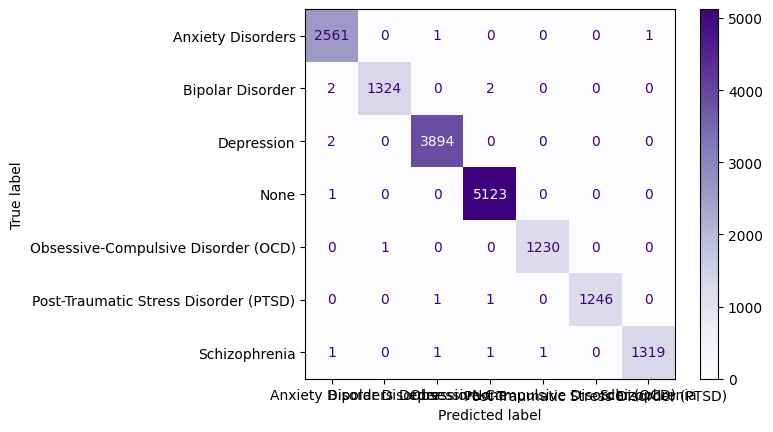

In [ ]:
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=le_results.classes_)
disp.plot(cmap='Purples')
plt.show()

In [ ]:
joblib.dump(le_results, 'label_encoder_results.joblib')
joblib.dump(model, 'disease_prediction_model.joblib')

['disease_prediction_model.joblib']